# Visualisation with `matplotlib` and `seaborn`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
FHRS_URL = 'https://opendata.camden.gov.uk/api/views/ggah-dkrr/rows.csv?accessType=DOWNLOAD'

Read in the Food Hygiene Rating Scheme data from `FHRS_URL` into a DataFrame called `fhrs`.

In [3]:
fhrs = pd.read_csv(FHRS_URL)

Change the data type of `Rating Date` to `datetime`.

In [4]:
fhrs['Rating Date'] = pd.to_datetime(fhrs['Rating Date'])

Filter `fhrs` to include only restaurants/cafés/canteens that are not exempt, and are not awaiting a new rating.

In [5]:
fhrs = fhrs[(fhrs['Business Type Description'] == 'Restaurant/Cafe/Canteen') & \
            (fhrs['Rating Value'] != 'Exempt') & \
            (fhrs['Rating Value'] != 'AwaitingInspection') & \
            (~fhrs['New Rating Pending'])]

Change the data type of `Rating Value` to `int`.

In [6]:
fhrs['Rating Value'] = fhrs['Rating Value'].astype('int')

Produce a bar plot of `Rating Value`.

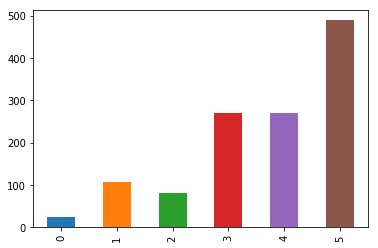

In [7]:
fhrs['Rating Value'].value_counts().sort_index().plot.bar()

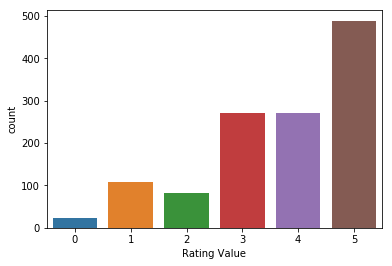

In [8]:
sns.countplot(x='Rating Value', data=fhrs)

Create a new variable `Rating Year` from `Rating Date`.

In [9]:
fhrs['Rating Year'] = fhrs['Rating Date'].dt.year

Produce a box plot of `Rating Value` grouped by `Rating Year`.

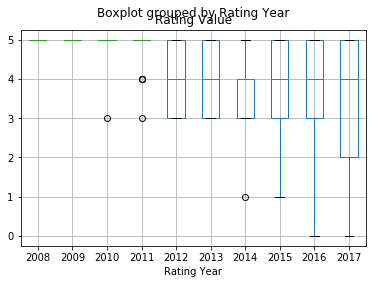

In [10]:
fhrs.boxplot(column='Rating Value', by='Rating Year')

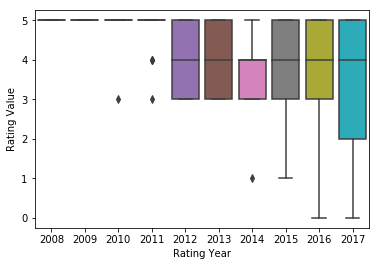

In [11]:
sns.boxplot(x='Rating Year', y='Rating Value', data=fhrs)

Produce a scatter plot of `Hygiene Score`, `Structural Score`, `Confidence In Management Score`, and `Rating Value`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b75932c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2b75495550>]], dtype=object)

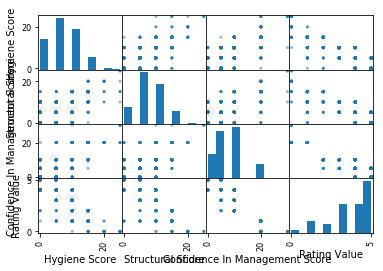

In [12]:
scores = ['Hygiene Score', 'Structural Score', 'Confidence In Management Score', 'Rating Value']
pd.plotting.scatter_matrix(fhrs[scores])

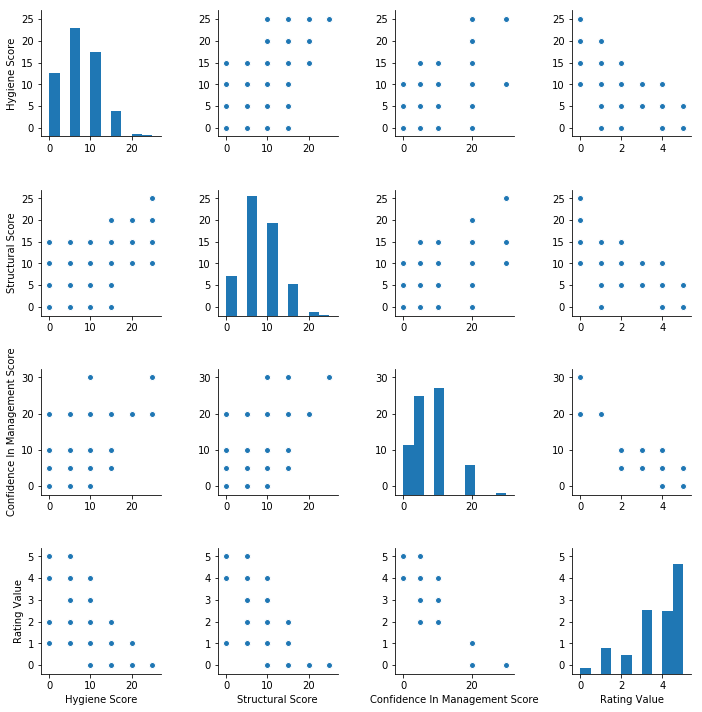

In [13]:
sns.pairplot(fhrs[scores].dropna())

Using `seaborn`, produce a scatter plot of `Hygiene Score` against `Rating Value` including a linear regression line. Add some jitter to prevent overplotting.

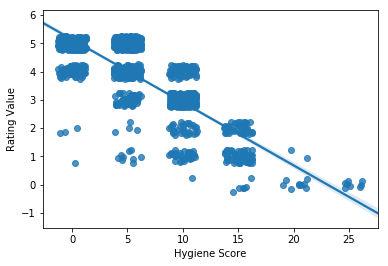

In [14]:
sns.regplot(x='Hygiene Score', y='Rating Value', data=fhrs, x_jitter=1.25, y_jitter=0.25)